##  Data Exploration and Preprocessing

### Importing dependence

In [1]:
import pandas as pd
import numpy as np
import torch as pt
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Loading Data sets

In [2]:
df = pd.read_csv(r'datasets/Stock Market Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [4]:
df.dtypes

Unnamed: 0             int64
Date                  object
Natural_Gas_Price    float64
Natural_Gas_Vol.     float64
Crude_oil_Price      float64
Crude_oil_Vol.       float64
Copper_Price         float64
Copper_Vol.          float64
Bitcoin_Price         object
Bitcoin_Vol.         float64
Platinum_Price        object
Platinum_Vol.        float64
Ethereum_Price        object
Ethereum_Vol.        float64
S&P_500_Price         object
Nasdaq_100_Price      object
Nasdaq_100_Vol.      float64
Apple_Price          float64
Apple_Vol.           float64
Tesla_Price          float64
Tesla_Vol.           float64
Microsoft_Price      float64
Microsoft_Vol.       float64
Silver_Price         float64
Silver_Vol.          float64
Google_Price         float64
Google_Vol.          float64
Nvidia_Price         float64
Nvidia_Vol.          float64
Berkshire_Price       object
Berkshire_Vol.       float64
Netflix_Price        float64
Netflix_Vol.         float64
Amazon_Price         float64
Amazon_Vol.   

In [5]:
df.shape

(1243, 39)

In [6]:
df.Date = pd.to_datetime(df.Date,format='%d-%m-%Y')

In [7]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.replace(',', '').astype('float64')

print(df.dtypes)


Unnamed: 0                    int64
Date                 datetime64[ns]
Natural_Gas_Price           float64
Natural_Gas_Vol.            float64
Crude_oil_Price             float64
Crude_oil_Vol.              float64
Copper_Price                float64
Copper_Vol.                 float64
Bitcoin_Price               float64
Bitcoin_Vol.                float64
Platinum_Price              float64
Platinum_Vol.               float64
Ethereum_Price              float64
Ethereum_Vol.               float64
S&P_500_Price               float64
Nasdaq_100_Price            float64
Nasdaq_100_Vol.             float64
Apple_Price                 float64
Apple_Vol.                  float64
Tesla_Price                 float64
Tesla_Vol.                  float64
Microsoft_Price             float64
Microsoft_Vol.              float64
Silver_Price                float64
Silver_Vol.                 float64
Google_Price                float64
Google_Vol.                 float64
Nvidia_Price                

### Handling missing values

In [8]:
df.isnull().sum()

Unnamed: 0             0
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64

In [9]:
imputer = KNNImputer(n_neighbors = 3,weights="uniform")

In [10]:
imputed_data = imputer.fit_transform(df.drop(columns=['Date']))

In [11]:
df_cleaned = pd.DataFrame(imputed_data, columns=df.columns.drop('Date'))
df_cleaned['Date'] = df['Date']

In [12]:
df_cleaned.isnull().sum()

Unnamed: 0           0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
Date                 0
dtype: int64

In [13]:
df = df_cleaned

### EDA

In [14]:
correlation_matrix = df.corr()

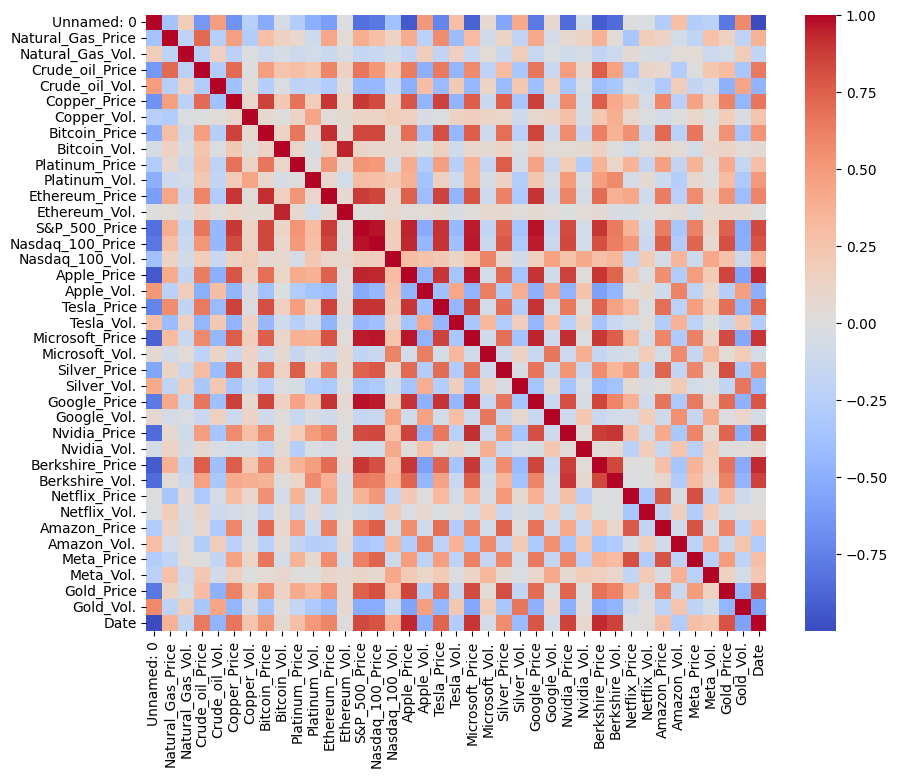

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

plt.show()

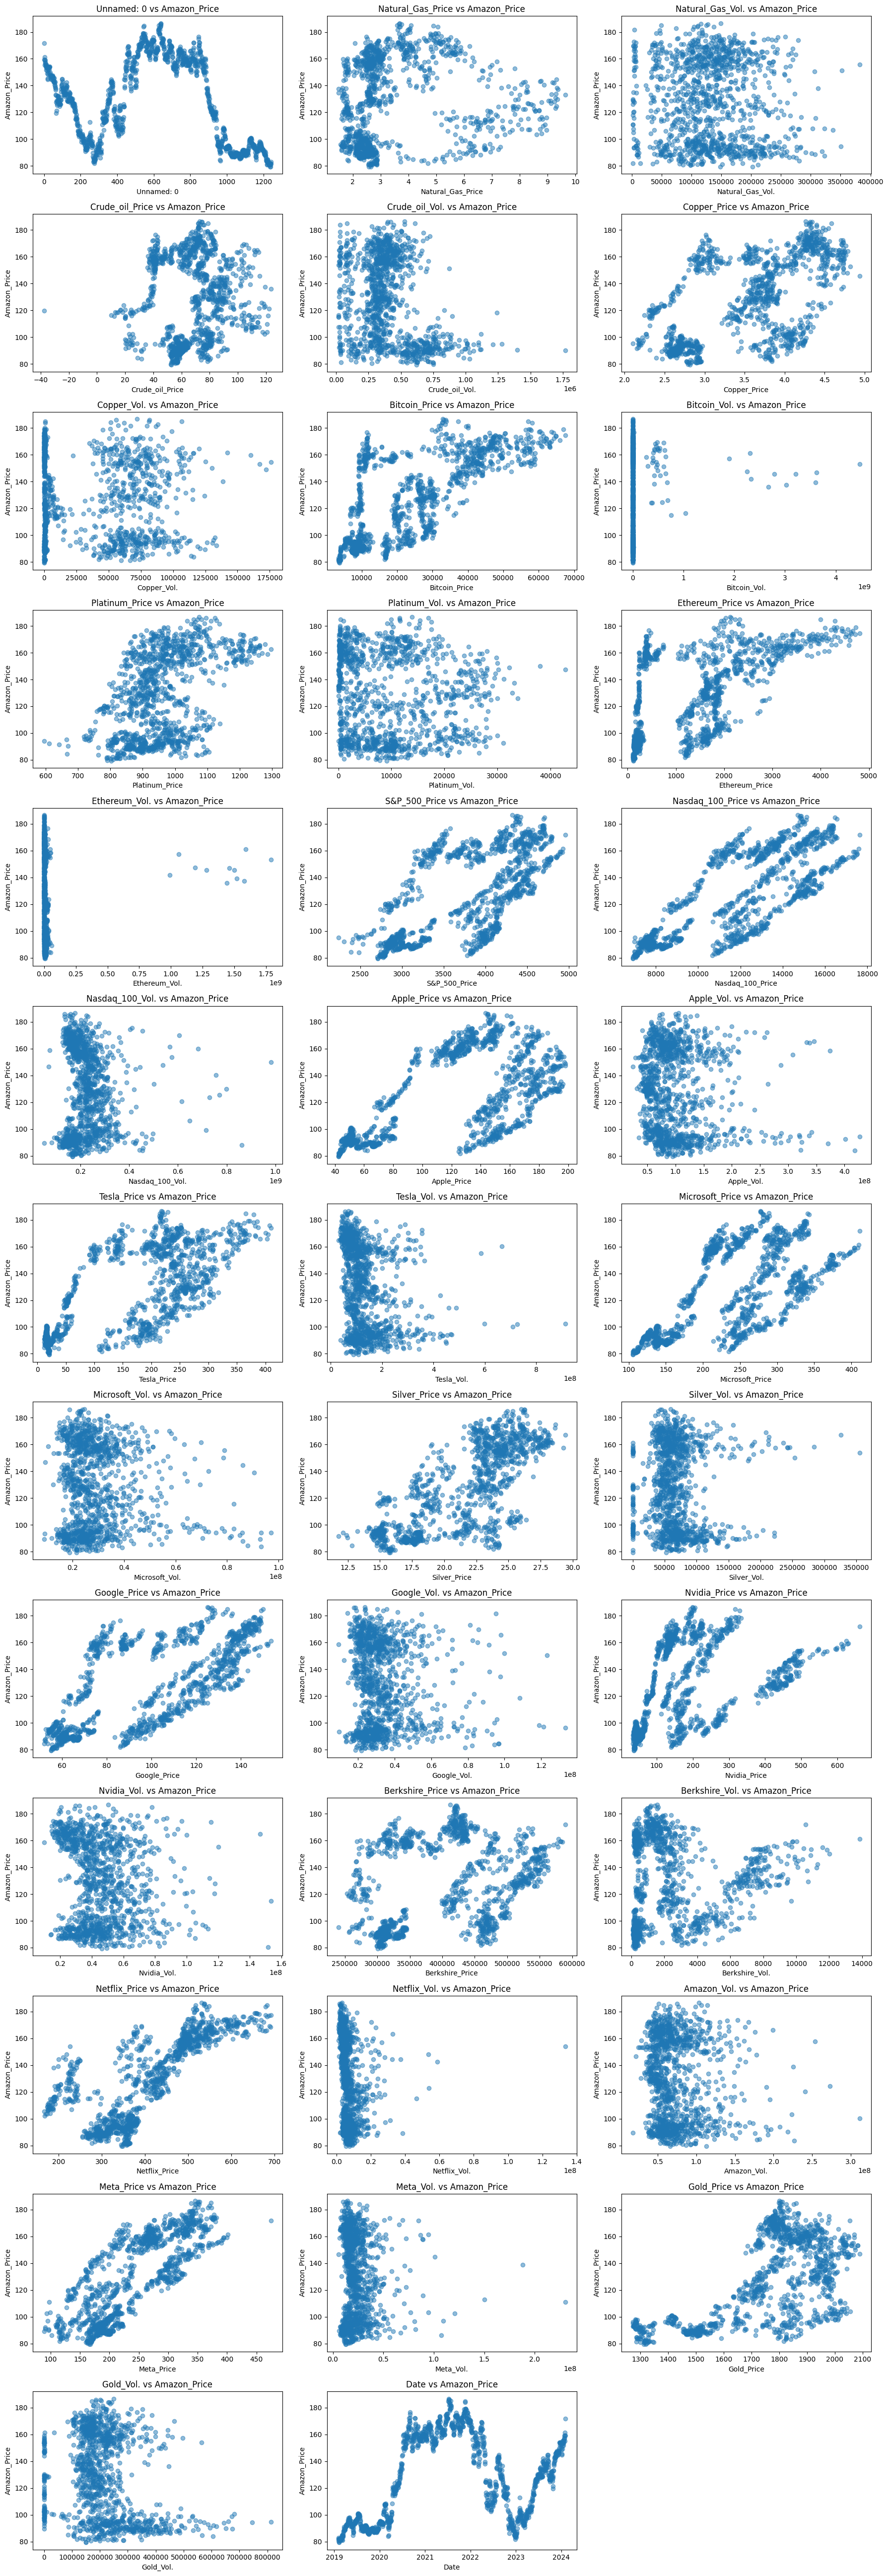

In [16]:
plots_per_row = 3 
num_cols = len(df.columns) - 1  
num_rows = (num_cols // plots_per_row) + (num_cols % plots_per_row > 0) 

plt.figure(figsize=(plots_per_row * 6, num_rows * 4)) 

plot_index = 1

for col in df.columns:
    if col != 'Amazon_Price': 
        plt.subplot(num_rows, plots_per_row, plot_index)
        plt.scatter(df[col], df['Amazon_Price'], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel('Amazon_Price')
        plt.title(f'{col} vs Amazon_Price')
        plot_index += 1

plt.tight_layout()  
plt.show()


## Model Development

#### selecting columns with high correlation

In [17]:
df.columns

Index(['Unnamed: 0', 'Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price',
       'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.', 'Date'],
      dtype='object')

In [18]:
col_cor = ['Copper_Price','Bitcoin_Price','Platinum_Price','Ethereum_Price', 'S&P_500_Price', 'Nasdaq_100_Price',
            'Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Silver_Price', 'Google_Price',  'Nvidia_Price',
            'Netflix_Price', 'Meta_Price', 'Gold_Price']

In [19]:
X = df[col_cor]
y = df['Amazon_Price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Efficiency (R² score):", r2)


Efficiency (R² score): 0.9432626967175046


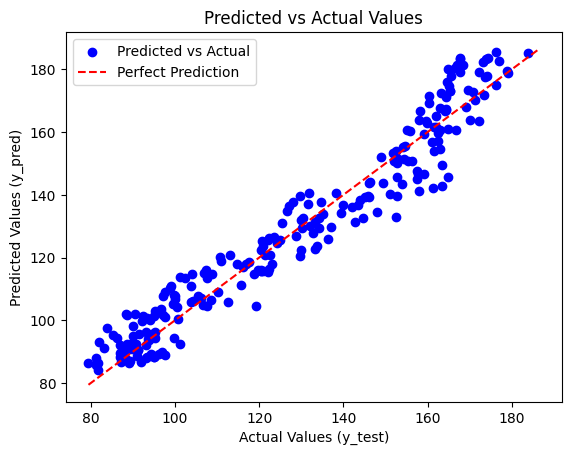

In [24]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


In [25]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 5.827573110338442
Root Mean Squared Error (RMSE): 7.259029843058462


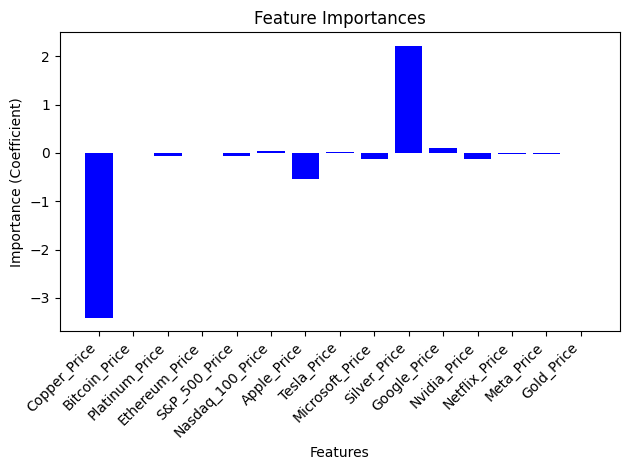

In [26]:
coefficients = model.coef_

# Plotting the feature importances
plt.bar(col_cor, coefficients, color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance (Coefficient)')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()